In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
data_files=['2024-citibike-tripdata/1_January/JC-202401-citibike-tripdata.csv',
            '2024-citibike-tripdata/2_February/JC-202402-citibike-tripdata.csv',
            '2024-citibike-tripdata/3_March/JC-202403-citibike-tripdata.csv'
           ]

dfs = [pd.read_csv(f) for f in data_files]

df = pd.concat(dfs,ignore_index=True)

print(df.shape)
df.info()

(171855, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171855 entries, 0 to 171854
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             171855 non-null  object 
 1   rideable_type       171855 non-null  object 
 2   started_at          171855 non-null  object 
 3   ended_at            171855 non-null  object 
 4   start_station_name  171780 non-null  object 
 5   start_station_id    171780 non-null  object 
 6   end_station_name    171330 non-null  object 
 7   end_station_id      171312 non-null  object 
 8   start_lat           171855 non-null  float64
 9   start_lng           171855 non-null  float64
 10  end_lat             171801 non-null  float64
 11  end_lng             171801 non-null  float64
 12  member_casual       171855 non-null  object 
dtypes: float64(4), object(9)
memory usage: 17.0+ MB


In [4]:
# # df = df[~df['end_station_id'].isin(['HB202']) & ~df['start_station_id'].isin(['HB202'])]
# df['start_station_id'] = pd.to_numeric(df['start_station_id'], errors='coerce')
# df['end_station_id'] = pd.to_numeric(df['end_station_id'], errors='coerce')

# df = df.dropna(subset=['start_station_id', 'end_station_id'])

df['end_station_id'] = pd.Categorical(df['end_station_id']).codes
df['start_station_id'] = pd.Categorical(df['start_station_id']).codes

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0744109F13385D1D,electric_bike,2024-01-15 15:18:07,2024-01-15 15:32:44,Morris Canal,73,Oakland Ave,155,40.712297,-74.038185,40.737604,-74.052478,member
1,B1488BFEF9118000,classic_bike,2024-01-13 15:32:50,2024-01-13 15:36:18,JC Medical Center,96,Grove St PATH,196,40.715391,-74.049692,40.719410,-74.043090,member
2,95A2FE8E51B4C836,classic_bike,2024-01-19 13:11:00,2024-01-19 13:14:44,Morris Canal,73,Exchange Pl,197,40.712419,-74.038526,40.716366,-74.034344,member
3,95D9AFF6A1652DC1,classic_bike,2024-01-23 07:03:49,2024-01-23 07:07:11,Morris Canal,73,Exchange Pl,197,40.712419,-74.038526,40.716366,-74.034344,member
4,5F7408988A83B1B3,classic_bike,2024-01-01 16:46:10,2024-01-01 16:50:31,Morris Canal,73,Harborside,190,40.712419,-74.038526,40.719252,-74.034234,member


In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])

df['start_date'] = df['started_at'].dt.date
df['start_hour'] = df['started_at'].dt.hour
df['start_dayofweek'] = df['started_at'].dt.dayofweek
df['start_month'] = df['started_at'].dt.month
df['start_year'] = df['started_at'].dt.year

df['ended_at'] = pd.to_datetime(df['ended_at'])

df['end_date'] = df['ended_at'].dt.date
df['end_hour'] = df['ended_at'].dt.hour
df['end_dayofweek'] = df['ended_at'].dt.dayofweek
df['end_month'] = df['ended_at'].dt.month
df['end_year'] = df['ended_at'].dt.year

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_date,start_hour,start_dayofweek,start_month,start_year,end_date,end_hour,end_dayofweek,end_month,end_year
0,0744109F13385D1D,electric_bike,2024-01-15 15:18:07,2024-01-15 15:32:44,Morris Canal,73,Oakland Ave,155,40.712297,-74.038185,...,2024-01-15,15,0,1,2024,2024-01-15,15,0,1,2024
1,B1488BFEF9118000,classic_bike,2024-01-13 15:32:50,2024-01-13 15:36:18,JC Medical Center,96,Grove St PATH,196,40.715391,-74.049692,...,2024-01-13,15,5,1,2024,2024-01-13,15,5,1,2024
2,95A2FE8E51B4C836,classic_bike,2024-01-19 13:11:00,2024-01-19 13:14:44,Morris Canal,73,Exchange Pl,197,40.712419,-74.038526,...,2024-01-19,13,4,1,2024,2024-01-19,13,4,1,2024
3,95D9AFF6A1652DC1,classic_bike,2024-01-23 07:03:49,2024-01-23 07:07:11,Morris Canal,73,Exchange Pl,197,40.712419,-74.038526,...,2024-01-23,7,1,1,2024,2024-01-23,7,1,1,2024
4,5F7408988A83B1B3,classic_bike,2024-01-01 16:46:10,2024-01-01 16:50:31,Morris Canal,73,Harborside,190,40.712419,-74.038526,...,2024-01-01,16,0,1,2024,2024-01-01,16,0,1,2024


In [8]:
gd_outgoing = df.groupby([df['start_date'], df['start_station_id'],df['start_hour'],df['start_dayofweek'],df['start_month'],df['start_year'],df['rideable_type'],df['member_casual']]).size()
gd_outgoing= gd_outgoing.reset_index(name='total_bikes_outgoing_per_hour')
gd_outgoing

,start_date,start_station_id,start_hour,start_dayofweek,start_month,start_year,rideable_type,member_casual,total_bikes_outgoing_per_hour
0,2024-01-01,16,1,0,1,2024,electric_bike,casual,1
1,2024-01-01,16,1,0,1,2024,electric_bike,member,1
2,2024-01-01,16,2,0,1,2024,classic_bike,member,1
3,2024-01-01,16,2,0,1,2024,electric_bike,casual,5
4,2024-01-01,16,2,0,1,2024,electric_bike,member,1
...,...,...,...,...,...,...,...,...,...
111523,2024-03-31,98,18,6,3,2024,electric_bike,member,1
111524,2024-03-31,98,19,6,3,2024,classic_bike,member,2
111525,2024-03-31,98,20,6,3,2024,electric_bike,member,1
111526,2024-03-31,98,22,6,3,2024,classic_bike,member,1


In [9]:
gd_incoming = df.groupby([df['end_date'], df['end_station_id'],df['end_hour'],df['end_dayofweek'],df['end_month'],df['end_year'],df['rideable_type'],df['member_casual']]).size()
gd_incoming = gd_incoming.reset_index(name='total_bikes_incoming_per_hour')
gd_incoming

,end_date,end_station_id,end_hour,end_dayofweek,end_month,end_year,rideable_type,member_casual,total_bikes_incoming_per_hour
0,2024-01-01,-1,2,0,1,2024,electric_bike,member,1
1,2024-01-01,-1,4,0,1,2024,electric_bike,casual,1
2,2024-01-01,-1,4,0,1,2024,electric_bike,member,1
3,2024-01-01,-1,12,0,1,2024,electric_bike,casual,1
4,2024-01-01,-1,16,0,1,2024,electric_bike,casual,1
...,...,...,...,...,...,...,...,...,...
112333,2024-04-01,121,0,0,4,2024,electric_bike,casual,2
112334,2024-04-01,144,0,0,4,2024,classic_bike,casual,5
112335,2024-04-01,144,0,0,4,2024,electric_bike,casual,1
112336,2024-04-01,157,0,0,4,2024,classic_bike,member,1


In [10]:
gd_incoming.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
end_date,112338,92,2024-03-15,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,112338,NaN,NaN,NaN,150.379,27.571,-1,129,147,173,197
end_hour,112338,NaN,NaN,NaN,14.0242,5.15706,0,10,15,18,23
end_dayofweek,112338,NaN,NaN,NaN,2.96838,1.96156,0,1,3,5,6
end_month,112338,NaN,NaN,NaN,2.07288,0.818462,1,1,2,3,4
end_year,112338,NaN,NaN,NaN,2024,0,2024,2024,2024,2024,2024
rideable_type,112338,2,electric_bike,64457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_casual,112338,2,member,87702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bikes_incoming_per_hour,112338,NaN,NaN,NaN,1.5298,1.20953,1,1,1,2,39


In [11]:
gd_outgoing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
start_date,111528,91,2024-03-15,1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,111528,NaN,NaN,NaN,52.3633,25.2605,-1,31,49,74,98
start_hour,111528,NaN,NaN,NaN,13.5274,5.1578,0,9,14,18,23
start_dayofweek,111528,NaN,NaN,NaN,2.96706,1.95415,0,1,3,5,6
start_month,111528,NaN,NaN,NaN,2.07011,0.818665,1,1,2,3,3
start_year,111528,NaN,NaN,NaN,2024,0,2024,2024,2024,2024,2024
rideable_type,111528,2,electric_bike,64110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_casual,111528,2,member,87352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bikes_outgoing_per_hour,111528,NaN,NaN,NaN,1.54091,1.18104,1,1,1,2,26


In [12]:
gd_outgoing.isnull().sum()

start_date                       0
start_station_id                 0
start_hour                       0
start_dayofweek                  0
start_month                      0
start_year                       0
rideable_type                    0
member_casual                    0
total_bikes_outgoing_per_hour    0
dtype: int64

In [13]:
gd_incoming.isnull().sum()

end_date                         0
end_station_id                   0
end_hour                         0
end_dayofweek                    0
end_month                        0
end_year                         0
rideable_type                    0
member_casual                    0
total_bikes_incoming_per_hour    0
dtype: int64

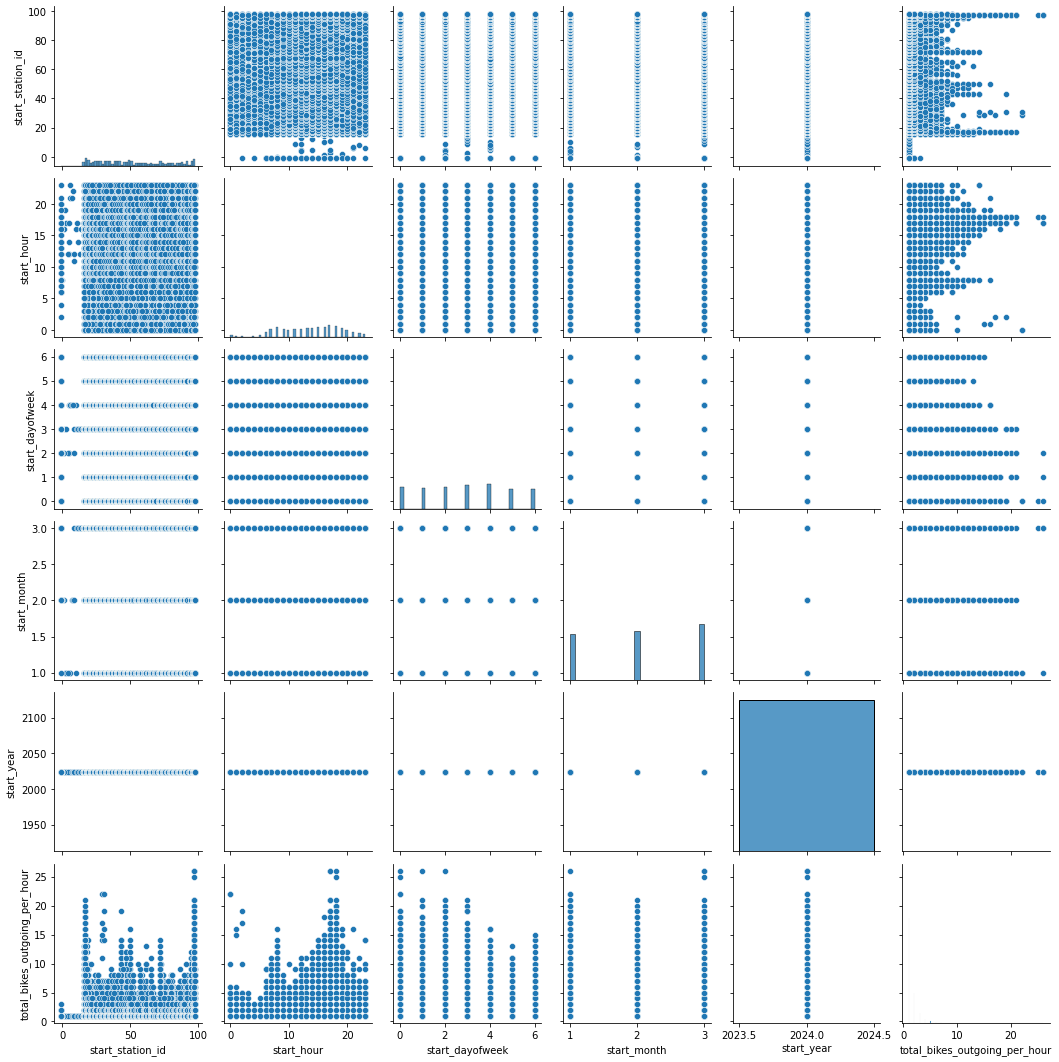

In [14]:
sns.pairplot(gd_outgoing)

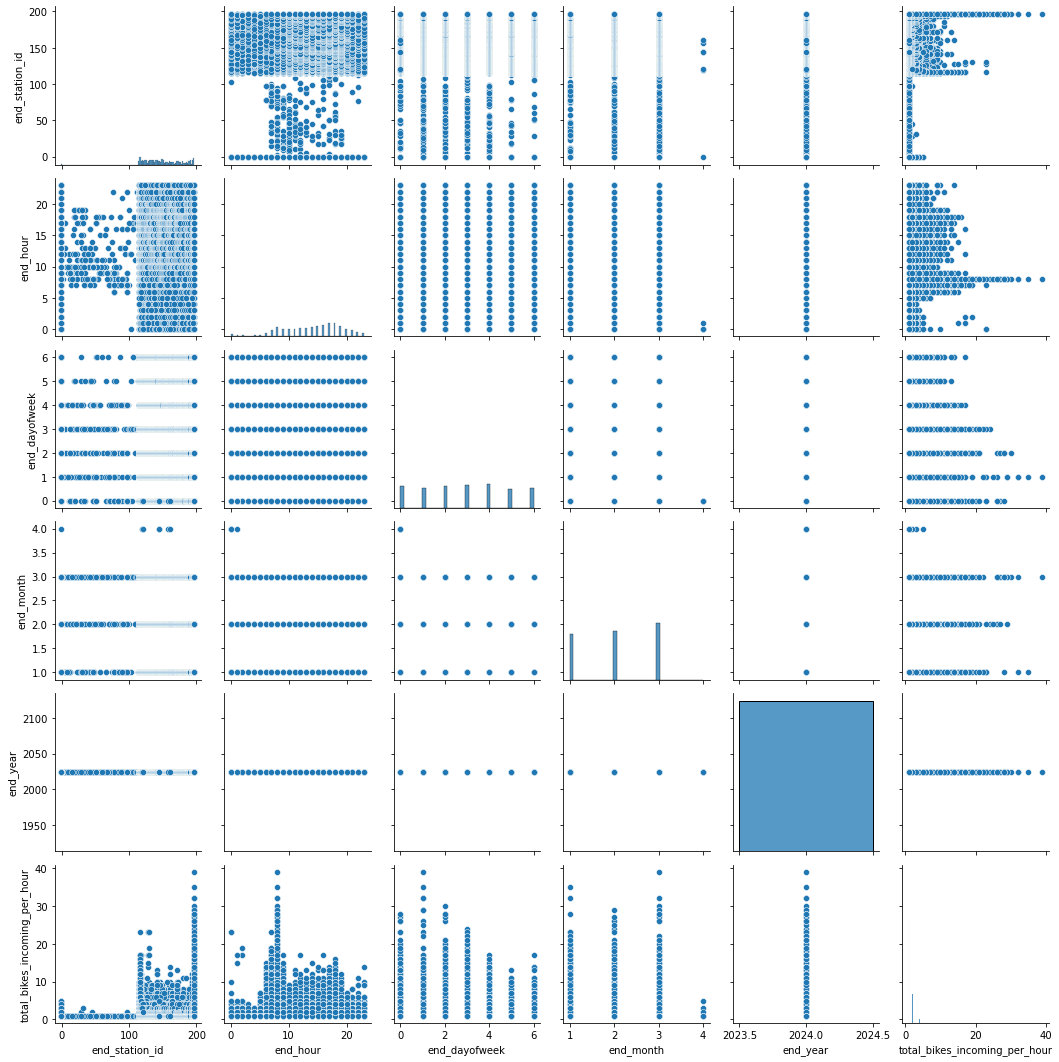

In [15]:
sns.pairplot(gd_incoming)

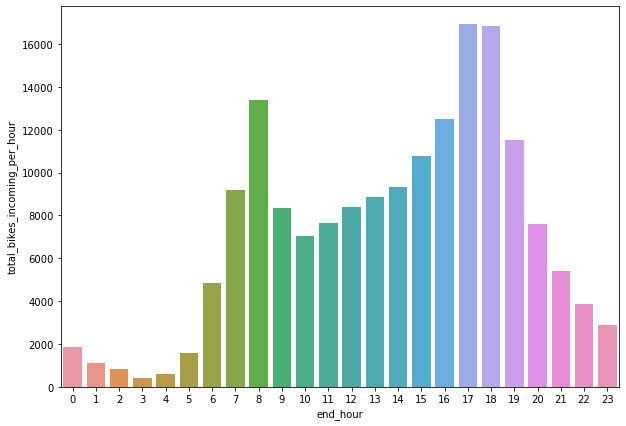

In [16]:
plt.figure(figsize=(10,7))
hour = gd_incoming.groupby("end_hour").sum().reset_index()
sns.barplot(x='end_hour',y='total_bikes_incoming_per_hour',data=hour )

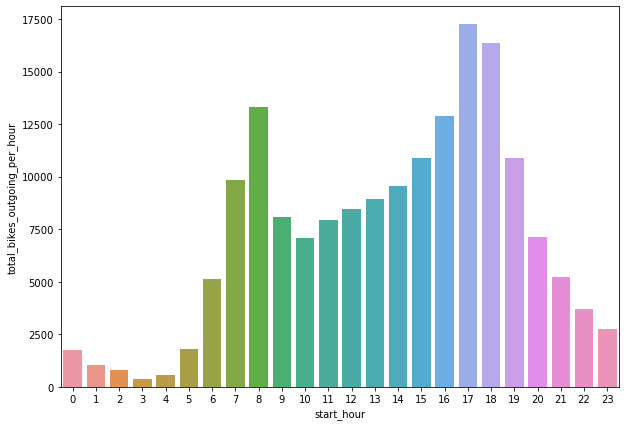

In [17]:
plt.figure(figsize=(10,7))
hour = gd_outgoing.groupby("start_hour").sum().reset_index()
sns.barplot(x='start_hour',y='total_bikes_outgoing_per_hour',data=hour )

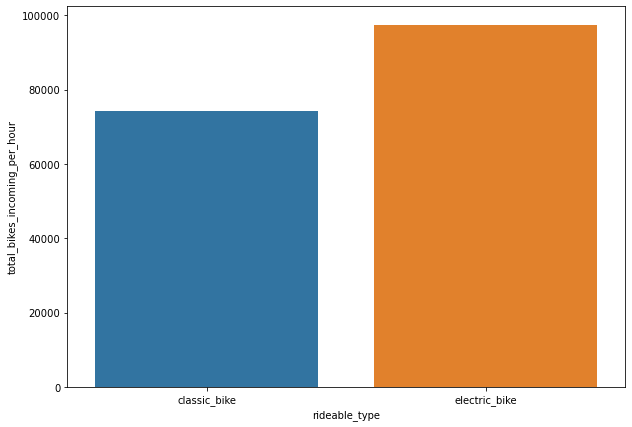

In [18]:
plt.figure(figsize=(10,7))
rideable_type = gd_incoming.groupby("rideable_type").sum().reset_index()
sns.barplot(x='rideable_type',y='total_bikes_incoming_per_hour',data=rideable_type )

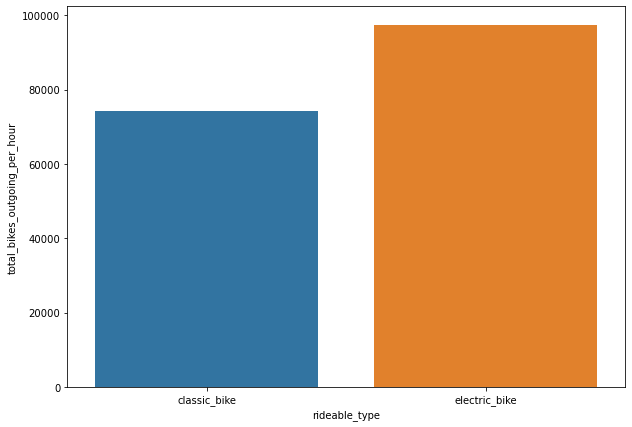

In [19]:
plt.figure(figsize=(10,7))
rideable_type = gd_outgoing.groupby("rideable_type").sum().reset_index()
sns.barplot(x='rideable_type',y='total_bikes_outgoing_per_hour',data=rideable_type )

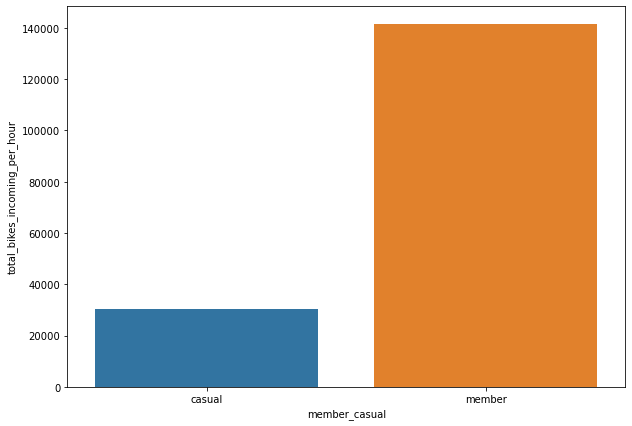

In [20]:
plt.figure(figsize=(10,7))
member_casual = gd_incoming.groupby("member_casual").sum().reset_index()
sns.barplot(x='member_casual',y='total_bikes_incoming_per_hour',data=member_casual )

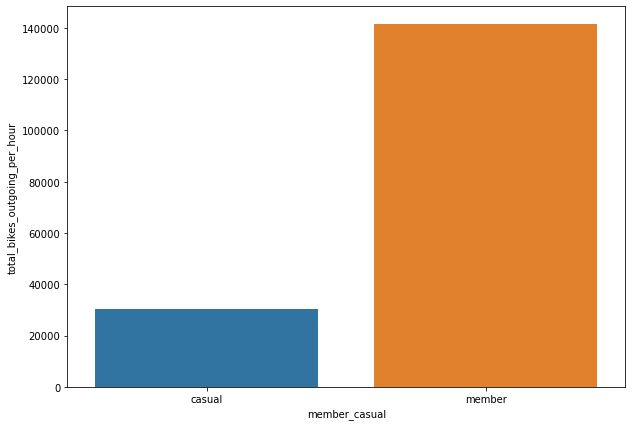

In [21]:
plt.figure(figsize=(10,7))
member_casual = gd_outgoing.groupby("member_casual").sum().reset_index()
sns.barplot(x='member_casual',y='total_bikes_outgoing_per_hour',data=member_casual )

<Figure size 1080x504 with 0 Axes>

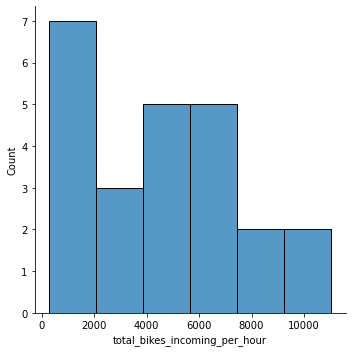

In [22]:
plt.figure(figsize=(15,7))
per_hour = gd_incoming.groupby([df['end_hour']]).size().reset_index(name='total_bikes_incoming_per_hour')
sns.displot(per_hour['total_bikes_incoming_per_hour'])

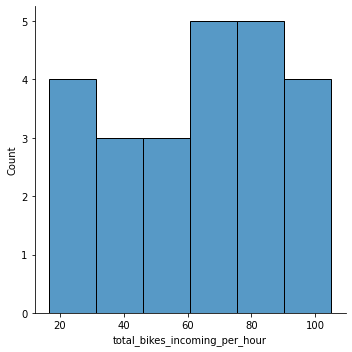

In [23]:
sns.displot(np.sqrt(per_hour['total_bikes_incoming_per_hour']))

<Figure size 1080x504 with 0 Axes>

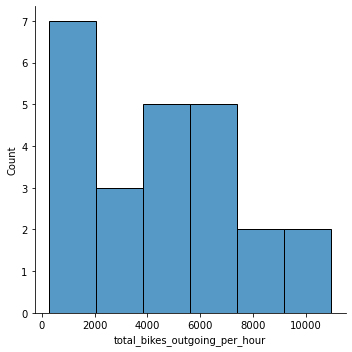

In [24]:
plt.figure(figsize=(15,7))
per_hour = gd_outgoing.groupby([df['end_hour']]).size().reset_index(name='total_bikes_outgoing_per_hour')
sns.displot(per_hour['total_bikes_outgoing_per_hour'])

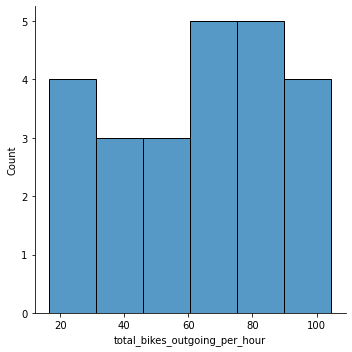

In [25]:
sns.displot(np.sqrt(per_hour['total_bikes_outgoing_per_hour']))

In [26]:
gd_incoming.info(),gd_outgoing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112338 entries, 0 to 112337
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   end_date                       112338 non-null  object
 1   end_station_id                 112338 non-null  int64 
 2   end_hour                       112338 non-null  int64 
 3   end_dayofweek                  112338 non-null  int64 
 4   end_month                      112338 non-null  int64 
 5   end_year                       112338 non-null  int64 
 6   rideable_type                  112338 non-null  object
 7   member_casual                  112338 non-null  object
 8   total_bikes_incoming_per_hour  112338 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  -----

(None, None)

In [27]:
gd_incoming.skew().sort_values(ascending=True)

end_hour                        -0.473084
end_station_id                  -0.471568
end_month                       -0.134230
end_dayofweek                   -0.002377
end_year                         0.000000
total_bikes_incoming_per_hour    6.334138
dtype: float64

In [28]:
gd_outgoing.skew().sort_values(ascending=True)

start_hour                      -0.294041
start_month                     -0.129764
start_dayofweek                 -0.004115
start_year                       0.000000
start_station_id                 0.304671
total_bikes_outgoing_per_hour    5.038527
dtype: float64

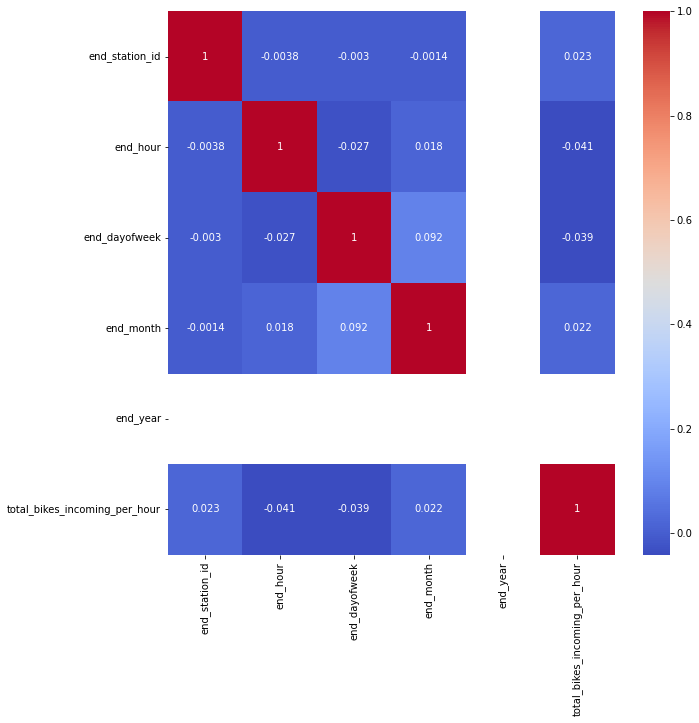

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(gd_incoming.corr(),annot=True,cmap='coolwarm')

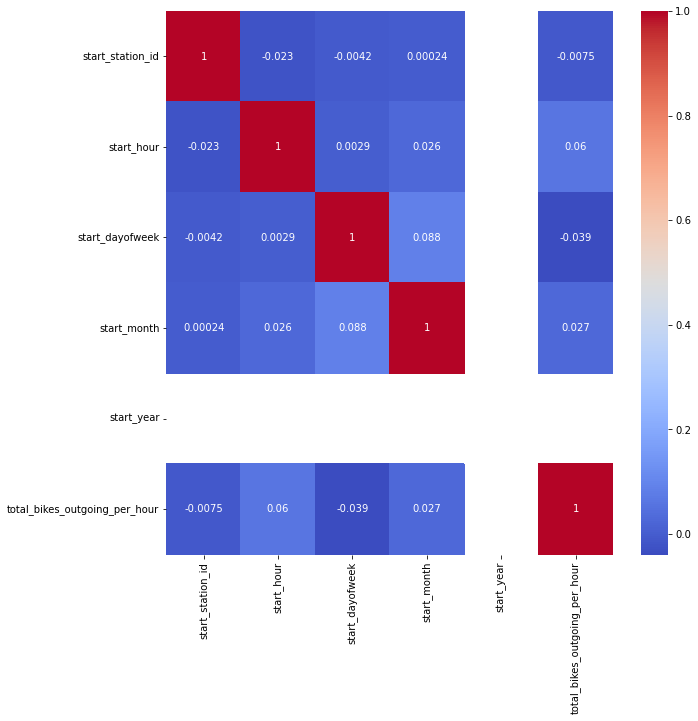

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(gd_outgoing.corr(),annot=True,cmap='coolwarm')

In [31]:
gd_incoming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112338 entries, 0 to 112337
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   end_date                       112338 non-null  object
 1   end_station_id                 112338 non-null  int64 
 2   end_hour                       112338 non-null  int64 
 3   end_dayofweek                  112338 non-null  int64 
 4   end_month                      112338 non-null  int64 
 5   end_year                       112338 non-null  int64 
 6   rideable_type                  112338 non-null  object
 7   member_casual                  112338 non-null  object
 8   total_bikes_incoming_per_hour  112338 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 7.7+ MB


In [32]:
gd_outgoing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   start_date                     111528 non-null  object
 1   start_station_id               111528 non-null  int64 
 2   start_hour                     111528 non-null  int64 
 3   start_dayofweek                111528 non-null  int64 
 4   start_month                    111528 non-null  int64 
 5   start_year                     111528 non-null  int64 
 6   rideable_type                  111528 non-null  object
 7   member_casual                  111528 non-null  object
 8   total_bikes_outgoing_per_hour  111528 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 7.7+ MB


In [33]:
gd_outgoing.drop(['start_date'],axis=1,inplace=True)
gd_incoming.drop(['end_date'],axis=1,inplace=True)

In [34]:
gd_incoming['rideable_type'].value_counts()

electric_bike    64457
classic_bike     47881
Name: rideable_type, dtype: int64

In [35]:
gd_incoming['member_casual'].value_counts()

member    87702
casual    24636
Name: member_casual, dtype: int64

In [36]:
gd_incoming['rideable_type'] = gd_incoming['rideable_type'].map({'electric_bike': 1,'classic_bike':0,'docked_bike':2}) 
gd_outgoing['rideable_type'] = gd_outgoing['rideable_type'].map({'electric_bike': 1,'classic_bike':0,'docked_bike':2}) 

In [37]:
gd_incoming['member_casual'] = gd_incoming['member_casual'].map({'member': 0,'casual':1}) 
gd_outgoing['member_casual'] = gd_outgoing['member_casual'].map({'member': 0,'casual':1}) 

In [38]:
X_incoming = gd_incoming.drop(['total_bikes_incoming_per_hour'],axis=1)
y_incoming = gd_incoming['total_bikes_incoming_per_hour']

In [39]:
X_outgoing = gd_outgoing.drop(['total_bikes_outgoing_per_hour'],axis=1)
y_outgoing = gd_outgoing['total_bikes_outgoing_per_hour']

In [40]:
X_train_incoming, X_test_incoming, y_train_incoming, y_test_incoming = train_test_split(X_incoming, y_incoming, test_size=0.2, random_state=42)

In [41]:
X_train_outgoing, X_test_outgoing, y_train_outgoing, y_test_outgoing = train_test_split(X_outgoing, y_outgoing, test_size=0.2, random_state=42)

In [42]:
sc1 = StandardScaler()

sc1.fit(X_train_incoming)

X_train_incoming = sc1.transform(X_train_incoming)
X_test_incoming = sc1.transform(X_test_incoming)

In [43]:
sc2 = StandardScaler()

sc2.fit(X_train_outgoing)

X_train_outgoing = sc2.transform(X_train_outgoing)
X_test_outgoing = sc2.transform(X_test_outgoing)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
def get_metrics(y_true,y_pred,model_name):
    MSE = mean_squared_error(y_true,y_pred)
    MAE = mean_absolute_error(y_true,y_pred)
    R2 = r2_score(y_true,y_pred)
    acc= accuracy_score(y_true,np.floor(y_pred))
    
    print(f'{model_name}\nMSE : {MSE}\nMAE : {MAE}\nR2 : {R2}\nAccuracy : {acc}')
    

In [45]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()

In [46]:
dtr_incoming = dtr.fit(X_train_incoming,y_train_incoming)
y_pred_dtr_incoming = dtr_incoming.predict(X_test_incoming)

rfr_incoming = rfr.fit(X_train_incoming,y_train_incoming)
y_pred_rfr_incoming = rfr_incoming.predict(X_test_incoming)

xgb_incoming = xgb.fit(X_train_incoming,y_train_incoming)
y_pred_xgb_incoming = xgb_incoming.predict(X_test_incoming)

In [47]:
dtr_outgoing = dtr.fit(X_train_outgoing,y_train_outgoing)
y_pred_dtr_outgoing = dtr_outgoing.predict(X_test_outgoing)

rfr_outgoing = rfr.fit(X_train_outgoing,y_train_outgoing)
y_pred_rfr_outgoing = rfr_outgoing.predict(X_test_outgoing)

xgb_outgoing = xgb.fit(X_train_outgoing,y_train_outgoing)
y_pred_xgb_outgoing = xgb_outgoing.predict(X_test_outgoing)

In [48]:
get_metrics(y_test_incoming,y_pred_dtr_incoming,"DecisionTreeRegressor - incoming")
get_metrics(y_test_incoming,y_pred_rfr_incoming,"RandomForestRegressor - incoming")
get_metrics(y_test_incoming,y_pred_xgb_incoming,"XGBRegressor - incoming")

DecisionTreeRegressor - incoming
MSE : 1.302116244337626
MAE : 0.6238769212509643
R2 : 0.10595950547986788
Accuracy : 0.5993412853836567
RandomForestRegressor - incoming
MSE : 1.0616424742443145
MAE : 0.6069036433660844
R2 : 0.2710701776401018
Accuracy : 0.6705536763396831
XGBRegressor - incoming
MSE : 0.8335761449966396
MAE : 0.5761038867736165
R2 : 0.4276618296302087
Accuracy : 0.6362382054477479


In [49]:
get_metrics(y_test_outgoing,y_pred_dtr_outgoing,"DecisionTreeRegressor - outgoing")
get_metrics(y_test_outgoing,y_pred_rfr_outgoing,"RandomForestRegressor - outgoing")
get_metrics(y_test_outgoing,y_pred_xgb_outgoing,"XGBRegressor - outgoing")

DecisionTreeRegressor - outgoing
MSE : 1.3709502425854527
MAE : 0.6554813353656714
R2 : -0.007647790659716547
Accuracy : 0.5802922980364028
RandomForestRegressor - outgoing
MSE : 1.0918073178388437
MAE : 0.6320114746171916
R2 : 0.19752212919729806
Accuracy : 0.655204877611405
XGBRegressor - outgoing
MSE : 0.8610408491788617
MAE : 0.5955586171693386
R2 : 0.36713537633094206
Accuracy : 0.6368241728682865


In [50]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start =200,stop=2000,num=10)]

max_features = ['auto', 'sqrt']

max_dept = [int(x) for x in np.linspace(10,120,num=12)]

min_samples_split = [2,5,10]

min_samples_leaf = [1,2,4]

bootstrap = [True,False]

random_grid = {
    'n_estimators' : n_estimators,
              'max_features':max_features,
              'max_depth':max_dept,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap
              }



In [53]:
gd_incoming_sample = gd_incoming.sample(frac=0.01)
X_incoming_sample = gd_incoming_sample.drop(['total_bikes_incoming_per_hour'],axis=1)
y_incoming_sample = gd_incoming_sample['total_bikes_incoming_per_hour']
X_train_incoming_sample, X_test_incoming_sample, y_train_incoming_sample, y_test_incoming_sample = train_test_split(X_incoming_sample, y_incoming_sample, test_size=0.2, random_state=42)

import time 
st_incoming = time.time()

rf_incoming = RandomForestRegressor()

rf_random_incoming = RandomizedSearchCV(estimator = rf_incoming, param_distributions = random_grid,n_iter = 100,cv =3,n_jobs = -1,random_state=42)

rf_random_incoming.fit(X_train_incoming_sample,y_train_incoming_sample)

rf_random_y_pred_incoming = rf_random_incoming.predict(X_test_incoming_sample)

print("Total time", time.time()-st_incoming)

Total time 151.98290991783142


In [54]:
rf_random_incoming.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [55]:
gd_outgoing_sample = gd_outgoing.sample(frac=0.01)
X_outgoing_sample = gd_outgoing_sample.drop(['total_bikes_outgoing_per_hour'],axis=1)
y_outgoing_sample = gd_outgoing_sample['total_bikes_outgoing_per_hour']
X_train_outgoing_sample, X_test_outgoing_sample, y_train_outgoing_sample, y_test_outgoing_sample = train_test_split(X_outgoing_sample, y_outgoing_sample, test_size=0.2, random_state=42)

import time 
st_outgoing = time.time()

rf_outgoing = RandomForestRegressor()

rf_random_outgoing = RandomizedSearchCV(estimator = rf_outgoing, param_distributions = random_grid,n_iter = 100,cv =3,n_jobs = -1,random_state=42)

rf_random_outgoing.fit(X_outgoing_sample,y_outgoing_sample)

rf_random_y_pred_outgoing = rf_random_outgoing.predict(X_test_outgoing_sample)

print("Total time", time.time()-st_incoming)

Total time 458.7186186313629


In [56]:
rf_random_outgoing.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [61]:
rfr_tuned_model_incoming = RandomForestRegressor(n_estimators= 1000,
                                                 min_samples_split= 5,
                                                 min_samples_leaf= 2,
                                                 max_features = 'sqrt',
                                                 max_depth= 10,
                                                 bootstrap = True)
rfr_tuned_model_incoming = rfr_tuned_model_incoming.fit(X_train_incoming,y_train_incoming)
y_pre_rfr_tuned_incoming = rfr_tuned_model_incoming.predict(X_test_incoming)

get_metrics(y_test_incoming,y_pre_rfr_tuned_incoming, "Hyperparameter tuned RandomForestRegressor")

Hyperparameter tuned RandomForestRegressor
MSE : 0.9359114466360823
MAE : 0.6257766774720127
R2 : 0.3573978235689562
Accuracy : 0.6910717464838882


In [62]:
rfr_tuned_model_outgoing = RandomForestRegressor(n_estimators= 1600,
                                                 min_samples_split= 5,
                                                 min_samples_leaf= 2,
                                                 max_features = 'sqrt',
                                                 max_depth= 10,
                                                 bootstrap = False)
rfr_tuned_model_outgoing = rfr_tuned_model_outgoing.fit(X_train_outgoing,y_train_outgoing)
y_pre_rfr_tuned_outgoing = rfr_tuned_model_outgoing.predict(X_test_outgoing)

get_metrics(y_test_outgoing,y_pre_rfr_tuned_outgoing, "Hyperparameter tuned RandomForestRegressor")

Hyperparameter tuned RandomForestRegressor
MSE : 0.9654466062436546
MAE : 0.6427197175235426
R2 : 0.2903971934483228
Accuracy : 0.6837173854568278
